In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [22]:
# Summary Statistics
print("Summary Statistics: ")
print(df.describe())

Summary Statistics: 
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [23]:
# Missing-Value Report
missing_values = df.isna().sum()
print("\nMissing Values per Column: ")
print(missing_values)


Missing Values per Column: 
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [24]:
# Columns with >5% missing values
total_rows = len(df)
cols_over_5_percent = missing_values[missing_values > 0.05 * total_rows].index.tolist()
print("\nColumns with >5% Missing Values: ")
print(cols_over_5_percent)


Columns with >5% Missing Values: 
['Comments']


In [25]:
# Missing Values in Key Columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

missing_key = df[key_cols].isna().sum()
print("Missing Values in Key Columns:")
print(missing_key)


Missing Values in Key Columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [26]:
# Basic Range Checks (Incorrect Entries)
incorrect = {}

for col in key_cols:
    incorrect[col] = df[df[col] < 0].shape[0]

print("Incorrect (negative) values per column:")
print(incorrect)


Incorrect (negative) values per column:
{'GHI': 261135, 'DNI': 266352, 'DHI': 263128, 'ModA': 0, 'ModB': 0, 'WS': 0, 'WSgust': 0}


In [27]:
# Outlier Detection Using IQR (Interquartile Range)
import numpy as np

def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

for col in key_cols:
    outliers = iqr_outliers(df[col])
    print(f"{col}: {len(outliers)} outliers")


GHI: 15853 outliers
DNI: 101688 outliers
DHI: 4407 outliers
ModA: 21017 outliers
ModB: 20613 outliers
WS: 3169 outliers
WSgust: 3665 outliers


In [28]:
# Quick Summary of Data Quality for Key Columns
summary = pd.DataFrame({
    'missing_values': df[key_cols].isna().sum(),
    'negative_values': [ (df[df[col] < 0].shape[0]) for col in key_cols ],
    'std_dev': df[key_cols].std(),
    'mean': df[key_cols].mean()
}, index=key_cols)

print(summary)


        missing_values  negative_values     std_dev        mean
GHI                  0           261135  298.495150  201.957515
DNI                  0           266352  218.652659  116.376337
DHI                  0           263128  158.946032  113.720571
ModA                 0                0  300.896893  206.643095
ModB                 0                0  288.889073  198.114691
WS                   0                0    1.239248    1.146113
WSgust               0                0    1.617053    1.691606


In [29]:
# Z-scores for the specified columns and flag rows where |Z| > 3

import numpy as np

# Columns to analyze
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = (df[cols] - df[cols].mean()) / df[cols].std()

# Flag rows with |Z| > 3
outlier_rows = df[(np.abs(z_scores) > 3).any(axis=1)]

print("Number of rows with Z-score > 3:")
print(len(outlier_rows))

print("\nOutlier rows:")
outlier_rows.head()


Number of rows with Z-score > 3:
16292

Outlier rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN


In [30]:
# Drop or impute (median) missing values in key columns

# Key columns to clean
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Drop or impute missing values
total_rows = len(df)

for col in key_cols:
    missing = df[col].isna().sum()
    threshold = 0.05 * total_rows   # 5% threshold
    
    if missing > threshold:
        # Impute with median
        df[col] = df[col].fillna(df[col].median())
    else:
        # Drop rows where this column is missing
        df = df.dropna(subset=[col])

# Confirm cleanup
df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [31]:
# Export cleaned DataFrame
output_path = '../data/benin_clean.csv'
df.to_csv(output_path, index=False)

print("Cleaned file saved to:", output_path)


Cleaned file saved to: ../data/benin_clean.csv


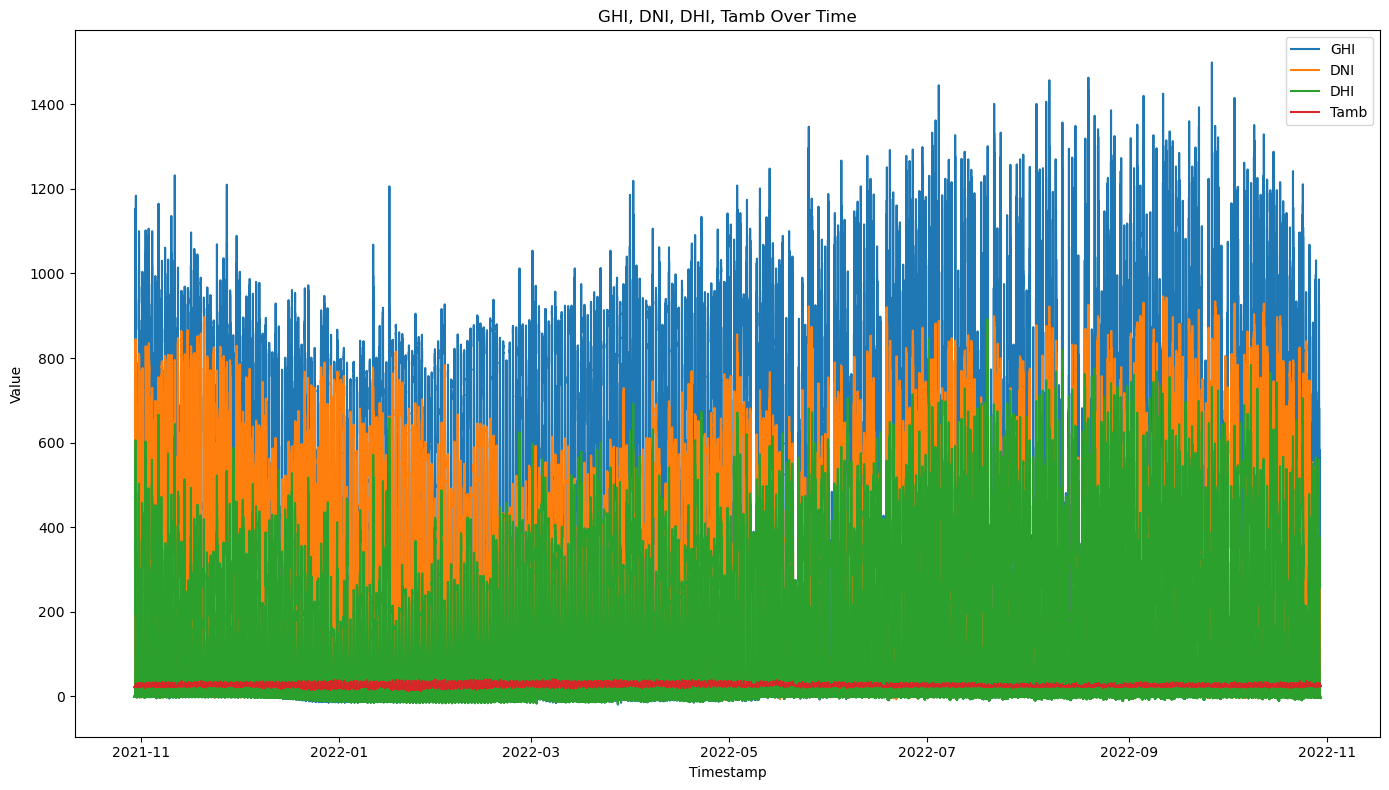

In [32]:
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.

# Ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Columns to plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(14, 8))

for col in cols:
    plt.plot(df['Timestamp'], df[col], label=col)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('GHI, DNI, DHI, Tamb Over Time')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

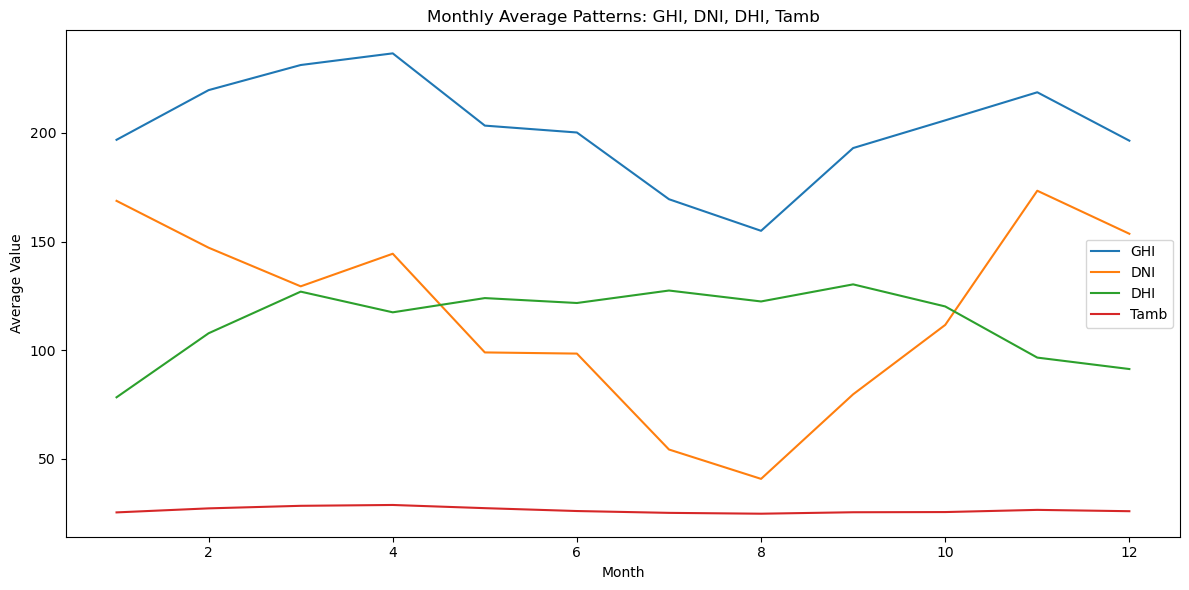

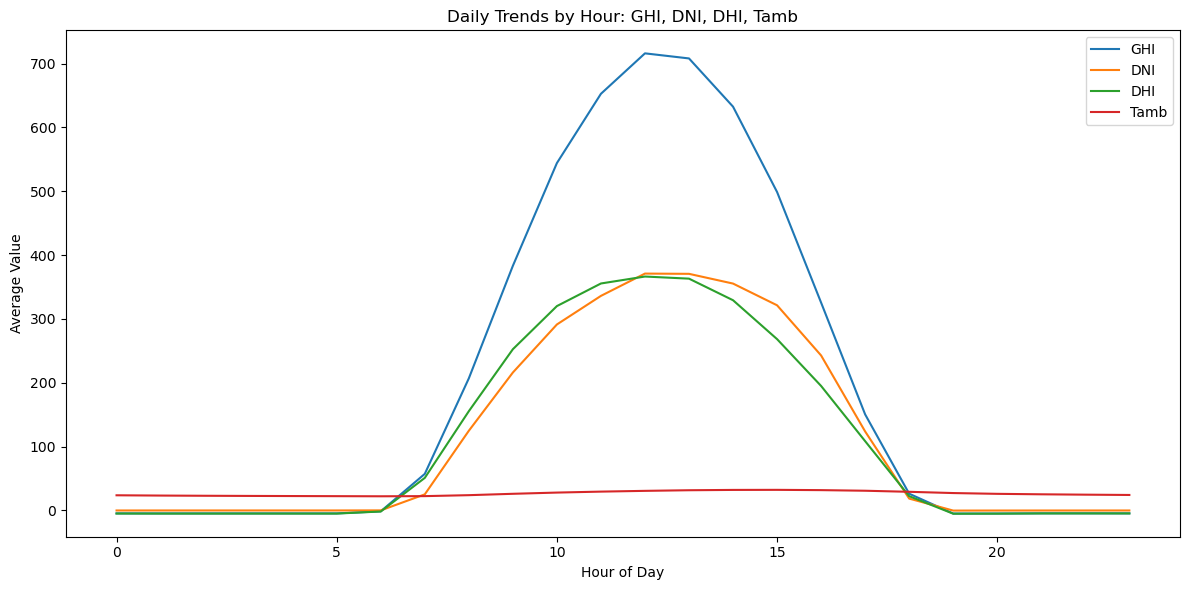

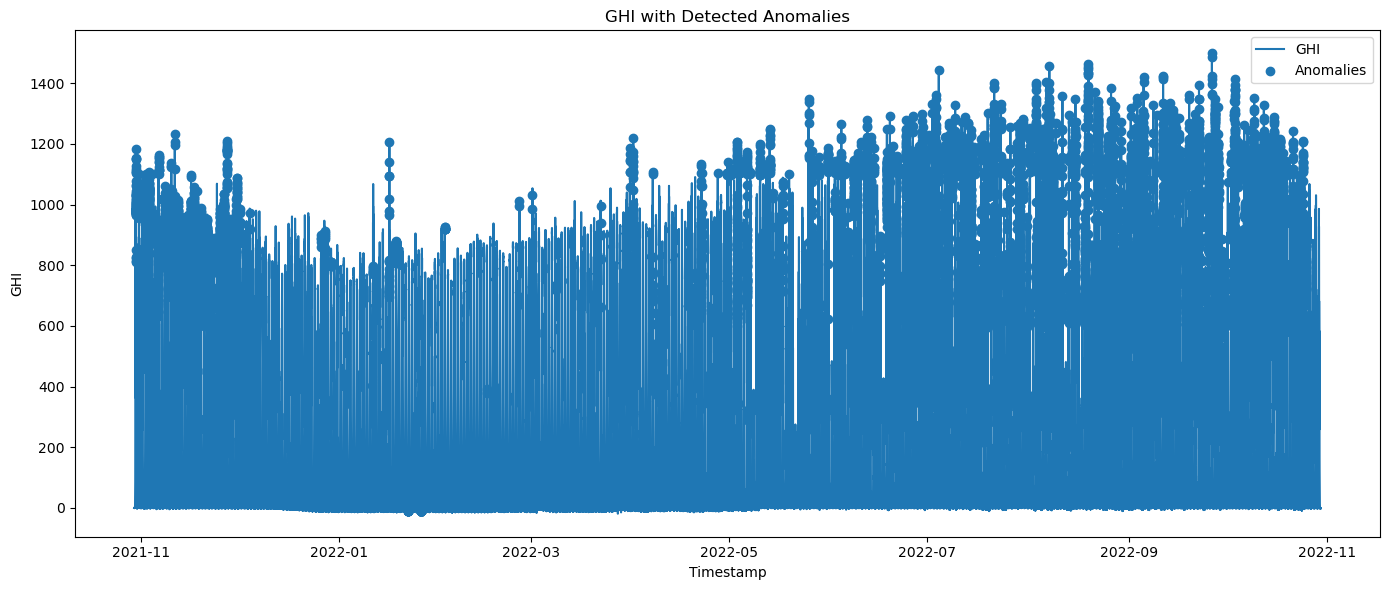

In [33]:
# Ensure timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create month and hour columns
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour

# 1. Monthly patterns (average by month)
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# 2. Daily trends (average by hour)
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# 3. Detect anomalies using Z-scores
from scipy.stats import zscore
cols = ['GHI', 'DNI', 'DHI', 'Tamb']
z = df[cols].apply(zscore)
anomalies = df[(abs(z) > 3).any(axis=1)]

# 4. Plots
import matplotlib.pyplot as plt

# Monthly pattern plot
plt.figure(figsize=(12,6))
monthly_avg.plot(figsize=(12,6))
plt.title("Monthly Average Patterns: GHI, DNI, DHI, Tamb")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

# Daily trend plot
hourly_avg.plot(figsize=(12,6))
plt.title("Daily Trends by Hour: GHI, DNI, DHI, Tamb")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

# Anomaly plot (GHI example)
plt.figure(figsize=(14,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.scatter(anomalies['Timestamp'], anomalies['GHI'], marker='o', label='Anomalies')
plt.title("GHI with Detected Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("GHI")
plt.legend()
plt.tight_layout()
plt.show()

                    ModA        ModB
CleaningFlag                        
Clean         189.764194  181.693908
Dirty         734.298355  711.448607


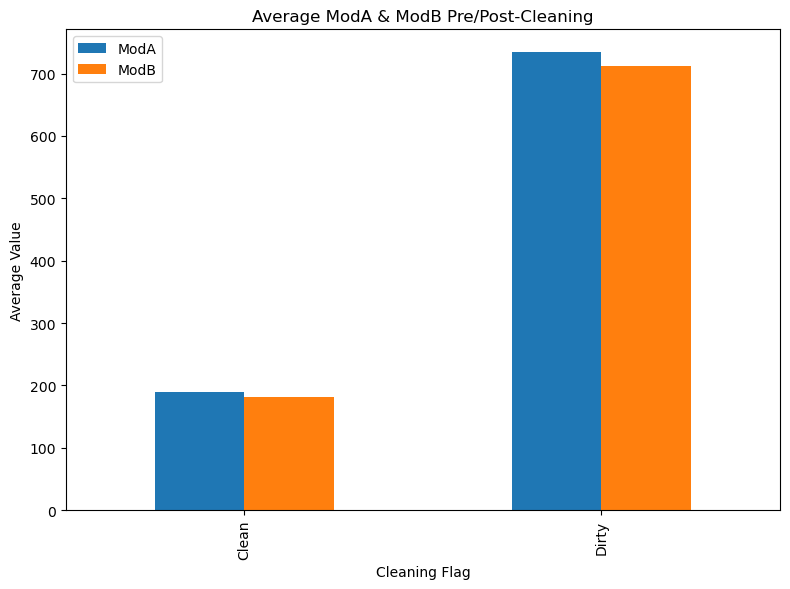

In [34]:
# Group by cleaning flag and compute average ModA & ModB
# Ensure CleaningFlag exists
if 'CleaningFlag' not in df.columns:
    from scipy.stats import zscore
    key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    z_scores = df[key_cols].apply(zscore, nan_policy='omit')
    df['CleaningFlag'] = ['Dirty' if any(abs(row) > 3 for row in z_scores.iloc[i]) else 'Clean' 
                          for i in range(len(df))]

# Group by CleaningFlag and compute average ModA & ModB
clean_group = df.groupby('CleaningFlag')[['ModA', 'ModB']].mean()
print(clean_group)

# Plot
clean_group.plot(kind='bar', figsize=(8,6), title='Average ModA & ModB Pre/Post-Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Flag')
plt.tight_layout()
plt.show()

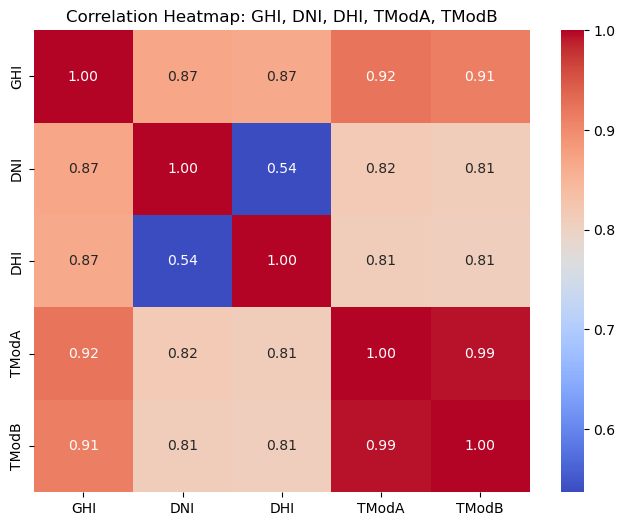

In [35]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

# Select columns for correlation
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.show()

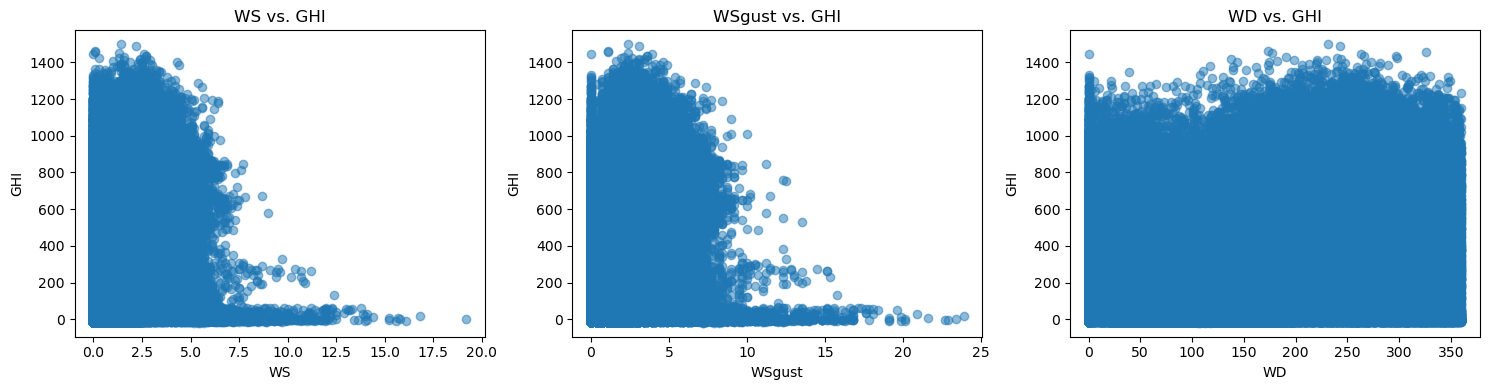

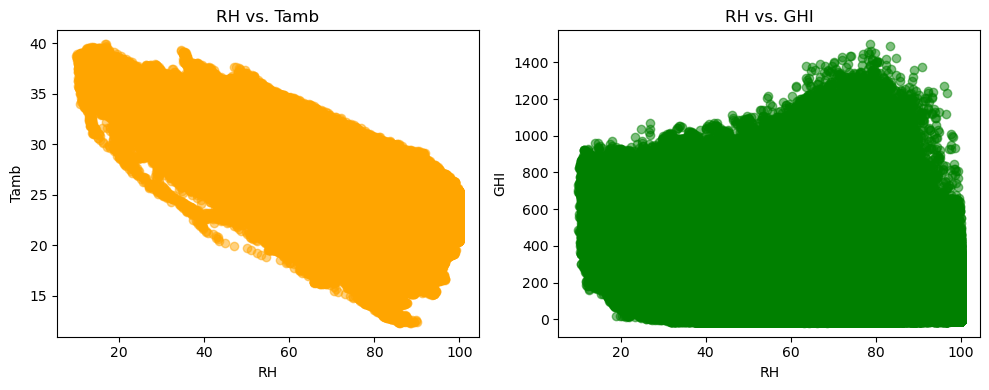

In [36]:
# Scatter plots: WS, WSgust, WD vs. GHI
scatter_cols = ['WS', 'WSgust', 'WD']
plt.figure(figsize=(15,4))

for i, col in enumerate(scatter_cols, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[col], df['GHI'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.title(f'{col} vs. GHI')

plt.tight_layout()
plt.show()

# Scatter plots: RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='orange')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.title('RH vs. Tamb')

plt.subplot(1,2,2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.title('RH vs. GHI')

plt.tight_layout()
plt.show()

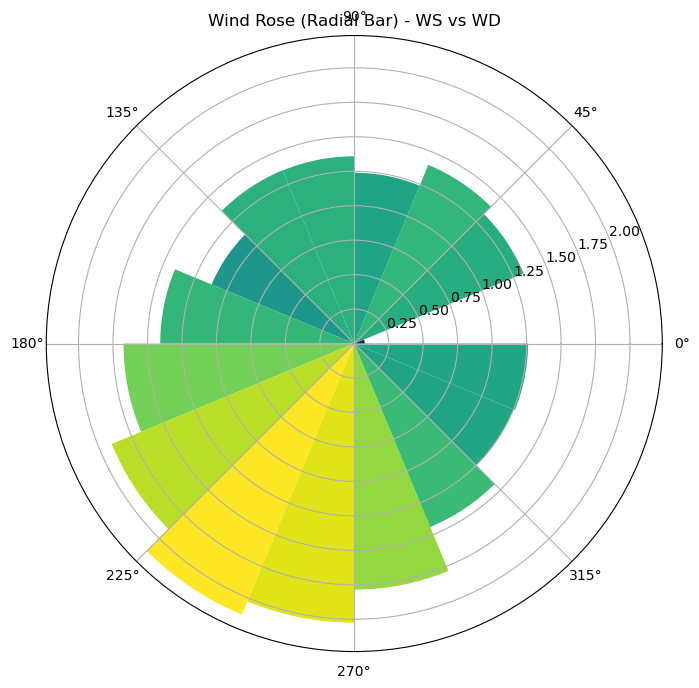

In [37]:
# Wind rose or radial bar plot of WS/WD.


# Bin the wind direction into 16 compass sectors
num_bins = 16
wd_bins = np.linspace(0, 360, num_bins + 1)
wd_labels = (wd_bins[:-1] + wd_bins[1:]) / 2  # midpoints for plotting

# Compute average wind speed per direction bin
ws_mean_per_bin = []
for i in range(num_bins):
    mask = (df['WD'] >= wd_bins[i]) & (df['WD'] < wd_bins[i+1])
    ws_mean_per_bin.append(df.loc[mask, 'WS'].mean())

# Convert angles to radians for polar plot
angles = np.deg2rad(wd_labels)

# Radial bar plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, ws_mean_per_bin, width=(2*np.pi/num_bins), bottom=0.0, color=plt.cm.viridis(ws_mean_per_bin/np.nanmax(ws_mean_per_bin)))

# Add title
plt.title("Wind Rose (Radial Bar) - WS vs WD", va='bottom')
plt.show()


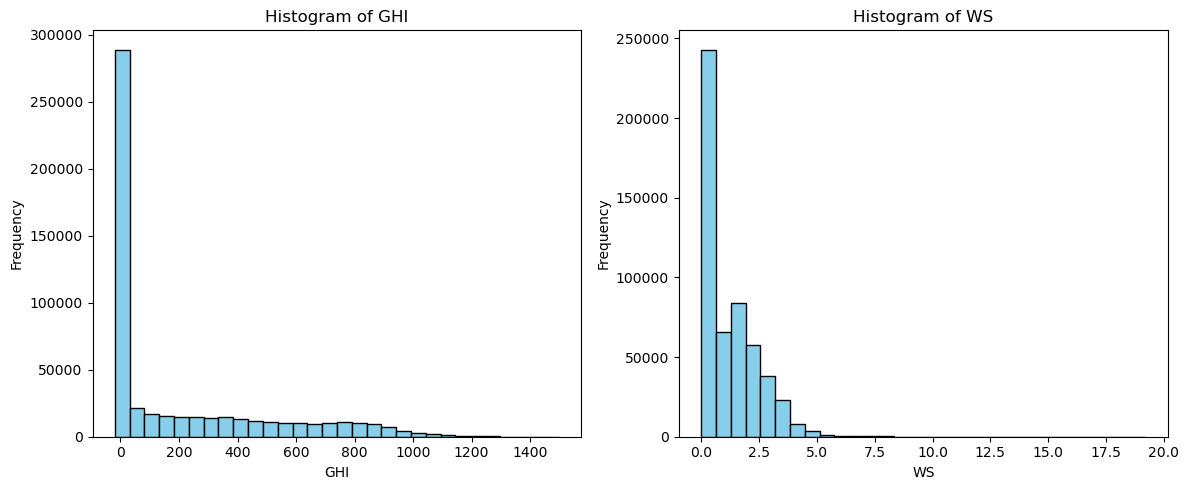

In [38]:
# Histograms for GHI and one other variable (e.g., WS).

# Variables to plot
vars_to_plot = ['GHI', 'WS']

plt.figure(figsize=(12,5))

for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(1, 2, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

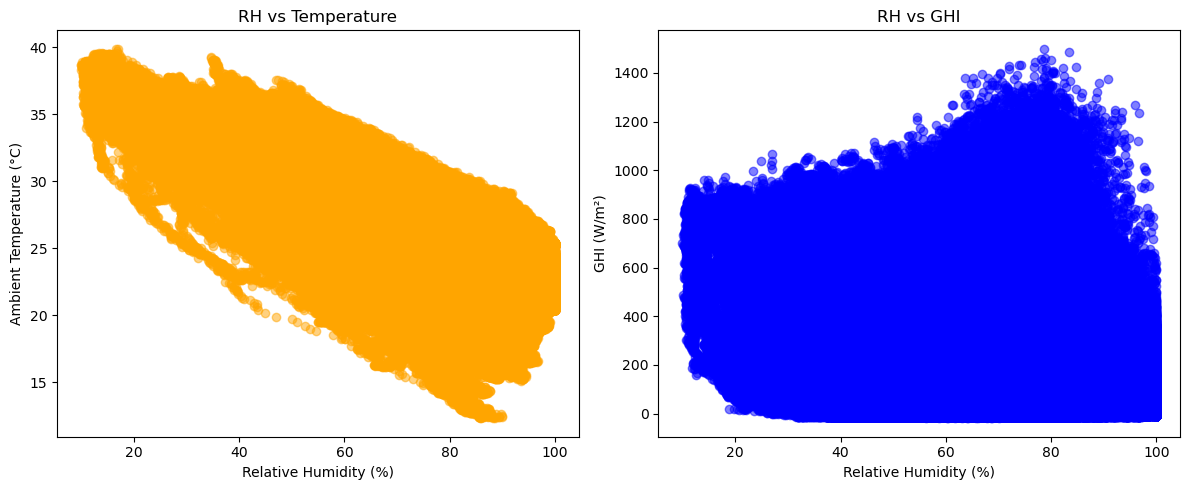

Correlation RH vs Temperature: -0.79
Correlation RH vs GHI: -0.55


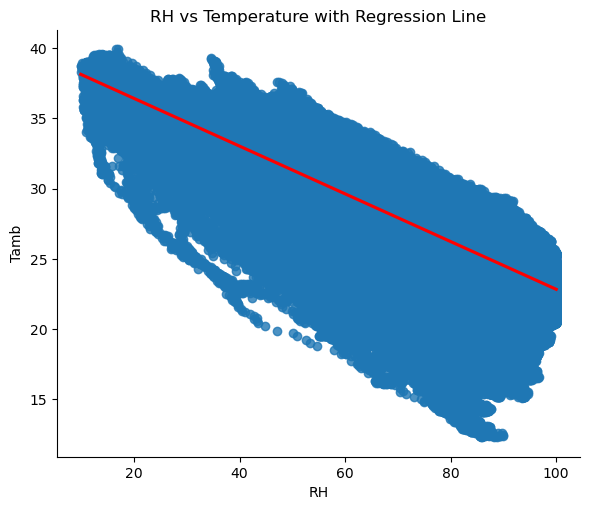

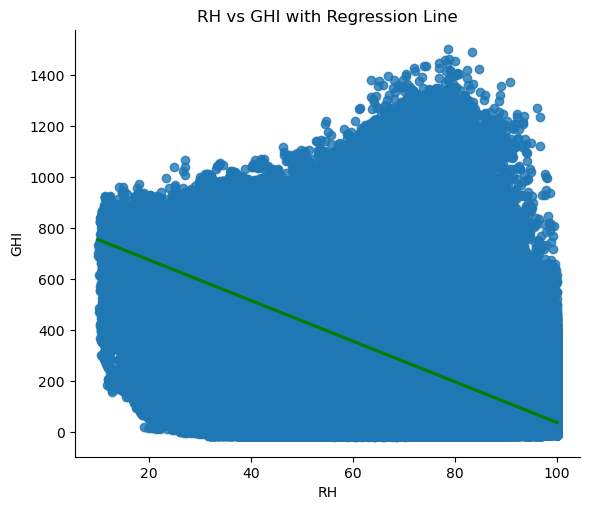

In [39]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.


# 1️⃣ Scatter plots to visually assess relationships
plt.figure(figsize=(12,5))

# RH vs Temperature
plt.subplot(1,2,1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs Temperature')

# RH vs GHI
plt.subplot(1,2,2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='blue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs GHI')

plt.tight_layout()
plt.show()

# 2️⃣ Compute correlation coefficients
corr_temp = df[['RH','Tamb']].corr().iloc[0,1]
corr_ghi = df[['RH','GHI']].corr().iloc[0,1]

print(f"Correlation RH vs Temperature: {corr_temp:.2f}")
print(f"Correlation RH vs GHI: {corr_ghi:.2f}")

# 3️⃣ Optional: Use a regression line for better trend visualization
sns.lmplot(x='RH', y='Tamb', data=df, aspect=1.2, line_kws={'color':'red'})
plt.title('RH vs Temperature with Regression Line')
plt.show()

sns.lmplot(x='RH', y='GHI', data=df, aspect=1.2, line_kws={'color':'green'})
plt.title('RH vs GHI with Regression Line')
plt.show()


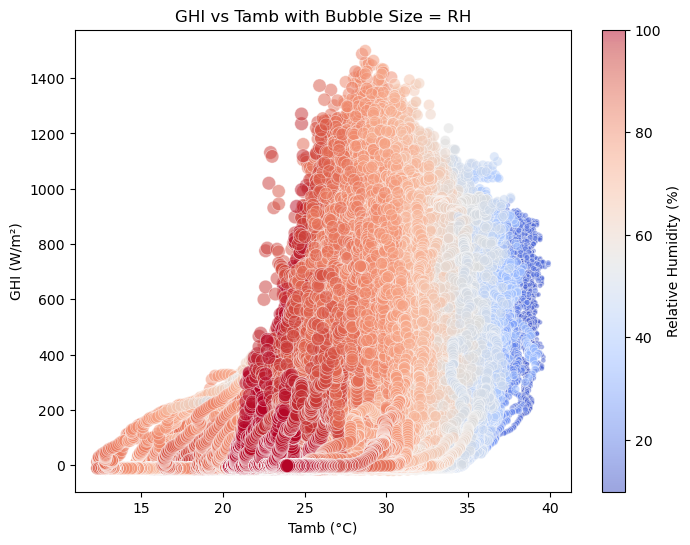

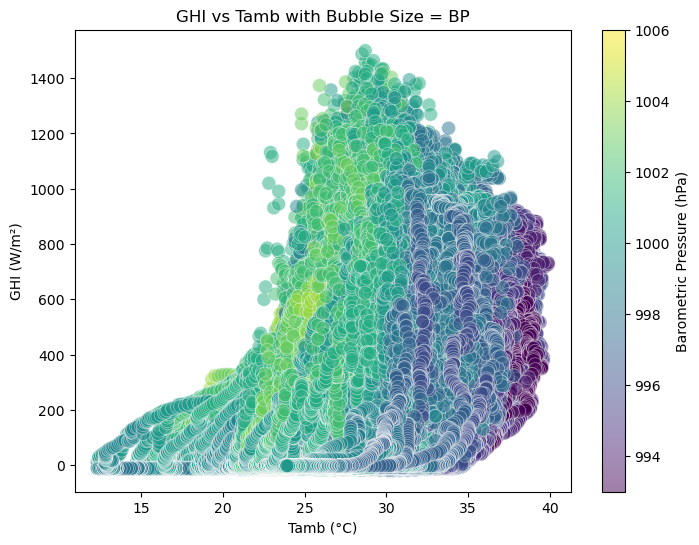

In [40]:
# GHI vs. Tamb with bubble size = RH or BP.


# Bubble size = RH
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH'],            # bubble size
            alpha=0.5, 
            c=df['RH'],            # color by RH
            cmap='coolwarm', 
            edgecolors='w', 
            linewidth=0.5)
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb with Bubble Size = RH')
cbar = plt.colorbar()
cbar.set_label('Relative Humidity (%)')
plt.show()

# Bubble size = BP (if column exists)
if 'BP' in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df['Tamb'], df['GHI'], 
                s=df['BP']/10,       # scale down for visibility
                alpha=0.5, 
                c=df['BP'], 
                cmap='viridis', 
                edgecolors='w', 
                linewidth=0.5)
    plt.xlabel('Tamb (°C)')
    plt.ylabel('GHI (W/m²)')
    plt.title('GHI vs Tamb with Bubble Size = BP')
    cbar = plt.colorbar()
    cbar.set_label('Barometric Pressure (hPa)')
    plt.show()
